In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn import svm
import datetime as dt
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier 

In [2]:
pd.set_option('display.max_rows', 60)

In [3]:
df = pd.read_csv("./match_data_yearly/all_years.csv")
df= pd.get_dummies(df, columns=["Home","Away"])
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df

,Year,Sec,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeElo,...,Away_shonan-bellmare,Away_tokushima-vortis,Away_tokyo-verdy,Away_urawa-red-diamonds,Away_v-varen-nagasaki,Away_vegalta-sendai,Away_ventforet-kofu,Away_vissel-kobe,Away_yokohama-fa-marinos,Away_yokohama-fc
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-04,2006,1,9,3,1,1,0,万博,20916,1500.000000,...,0,0,0,1,0,0,0,0,0,0
2006-03-05,2006,1,28,7,0,2,2,小瀬,14277,1500.000000,...,0,0,0,0,0,0,0,0,0,0
2006-03-05,2006,1,22,31,2,0,1,味スタ,22531,1500.000000,...,0,0,0,0,0,0,0,0,0,0
2006-03-05,2006,1,13,23,1,1,0,静岡,28564,1500.000000,...,0,0,0,0,0,0,0,0,0,0
2006-03-05,2006,1,8,20,3,2,1,瑞穂陸,17199,1500.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,2020,34,1,20,1,1,0,カシマ,11251,1594.223262,...,0,0,0,0,0,0,0,0,0,0
2020-12-19,2020,34,8,10,1,0,1,豊田ス,16825,1514.711944,...,0,0,0,0,0,0,0,0,0,0
2020-12-19,2020,34,33,31,2,2,0,駅スタ,8966,1453.298544,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_past=df["2015":"2017"]
df_past

,Year,Sec,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeElo,...,Away_shonan-bellmare,Away_tokushima-vortis,Away_tokyo-verdy,Away_urawa-red-diamonds,Away_v-varen-nagasaki,Away_vegalta-sendai,Away_ventforet-kofu,Away_vissel-kobe,Away_yokohama-fa-marinos,Away_yokohama-fc
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-07,2015,1,8,46,3,3,0,豊田ス,33558,1537.204423,...,0,0,0,0,0,0,0,0,0,0
2015-03-07,2015,1,9,22,2,2,0,万博,18332,1592.025092,...,0,0,0,0,0,0,0,0,0,0
2015-03-07,2015,1,10,28,2,0,1,Ｅスタ,14671,1556.663157,...,0,0,0,0,0,0,1,0,0,0
2015-03-07,2015,1,33,78,2,1,1,ベアスタ,11580,1540.522193,...,0,0,0,0,0,0,0,0,0,0
2015-03-07,2015,1,54,29,2,0,1,ユアスタ,19375,1487.099458,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-02,2017,34,11,10,1,0,1,柏,13235,1579.135985,...,0,0,0,0,0,0,0,0,0,0
2017-12-02,2017,34,78,20,1,0,1,デンカＳ,19684,1395.762585,...,0,0,0,0,0,0,0,0,0,0
2017-12-02,2017,34,3,5,0,1,2,埼玉,41618,1588.917148,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df_future=df["2018"]
df_future

,Year,Sec,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeElo,...,Away_shonan-bellmare,Away_tokushima-vortis,Away_tokyo-verdy,Away_urawa-red-diamonds,Away_v-varen-nagasaki,Away_vegalta-sendai,Away_ventforet-kofu,Away_vissel-kobe,Away_yokohama-fa-marinos,Away_yokohama-fc
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-23,2018,1,33,18,1,1,0,ベアスタ,19633,1506.845658,...,0,0,0,0,0,0,0,1,0,0
2018-02-24,2018,1,22,3,1,1,0,味スタ,35951,1498.105282,...,0,0,0,1,0,0,0,0,0,0
2018-02-24,2018,1,10,14,1,0,1,Ｅスタ,17026,1502.597801,...,0,0,0,0,0,0,0,0,0,0
2018-02-24,2018,1,9,8,2,3,2,吹田Ｓ,28681,1521.678947,...,0,0,0,0,0,0,0,0,0,0
2018-02-24,2018,1,12,47,2,1,1,ＢＭＷス,12148,1393.588577,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-01,2018,34,5,20,1,2,2,日産ス,30608,1515.872359,...,0,0,0,0,0,0,0,0,0,0
2018-12-01,2018,34,47,7,4,4,0,トラスタ,12198,1375.844788,...,0,0,0,0,0,0,0,0,0,0
2018-12-01,2018,34,11,9,4,2,1,三協Ｆ柏,13067,1493.713599,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train=df_past.drop(["Year","Sec","HomeID","AwayID","HomeGF","AwayGF","W/L","Attendances","Stadium"],axis=1)
X_test = df_future.drop(["Year","Sec","HomeID","AwayID","HomeGF","AwayGF","W/L","Attendances","Stadium"], axis=1)

In [7]:
y_train = df_past["W/L"].values
y_test = df_future["W/L"].values

In [8]:
rf= RandomForestClassifier(max_depth=5)  
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred

array([1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2,

In [9]:
rf.score(X_test,y_test) 

0.39869281045751637

In [10]:
feature_imp=rf.feature_importances_
feature_imp

array([0.20224446, 0.18648906, 0.07674596, 0.10083168, 0.01148044,
       0.01104188, 0.01175829, 0.00610533, 0.00524526, 0.00571669,
       0.        , 0.00447389, 0.01622327, 0.00385495, 0.01777498,
       0.        , 0.00563048, 0.0096072 , 0.00406039, 0.        ,
       0.00649576, 0.0059249 , 0.00671443, 0.02361291, 0.01651473,
       0.        , 0.        , 0.01419144, 0.        , 0.01414698,
       0.00925675, 0.0046448 , 0.00580467, 0.        , 0.00777026,
       0.01352253, 0.00295938, 0.00849843, 0.00527763, 0.00844389,
       0.        , 0.00543048, 0.02666726, 0.0055969 , 0.01400098,
       0.        , 0.00647379, 0.01750838, 0.01114896, 0.        ,
       0.00563323, 0.01617501, 0.00886746, 0.00655115, 0.00217726,
       0.        , 0.        , 0.01287669, 0.        , 0.00417841,
       0.00853334, 0.00712293, 0.00799407, 0.        ])

In [11]:
df_imp = pd.DataFrame({'feature':X_train.columns, 'importance':rf.feature_importances_})
df_imp

,feature,importance
0,HomeElo,0.202244
1,AwayElo,0.186489
2,HomeED,0.076746
3,AwayED,0.100832
4,Home_albirex-niigata,0.011480
...,...,...
59,Away_vegalta-sendai,0.004178
60,Away_ventforet-kofu,0.008533
61,Away_vissel-kobe,0.007123
62,Away_yokohama-fa-marinos,0.007994


### Stairs

In [49]:
accuracies = []

def predict(year):
    df_past = pd.concat([df[f"{year-5}"],df[f"{year-4}"],df[f"{year-3}"],df[f"{year-2}"],df[f"{year-1}"]])
    X_train=df_past.drop(["Year","Sec","HomeID","AwayID","HomeGF","AwayGF","W/L","Attendances","Stadium"],axis=1)
    y_train = df_past["W/L"].values
    
    df_future = df[f"{year}"]
    X_test = df_future.drop(["Year","Sec","HomeID","AwayID","HomeGF","AwayGF","W/L","Attendances","Stadium"], axis=1)
    y_test = df_future["W/L"].values

    
    rf= RandomForestClassifier(max_depth=5)  
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
   
    accuracy = rf.score(X_test,y_test) 
    accuracies.append(accuracy)

In [50]:
for _ in range(10):
    for y in (2013,2014,2015,2016,2017,2018,2019,2020):
        predict(y)

In [51]:
np.mean(accuracies)

0.4620915032679738

In [52]:
accuracies

[0.5,
 0.4444444444444444,
 0.42810457516339867,
 0.49019607843137253,
 0.4673202614379085,
 0.42810457516339867,
 0.4738562091503268,
 0.4738562091503268,
 0.5,
 0.42810457516339867,
 0.42810457516339867,
 0.4869281045751634,
 0.4542483660130719,
 0.41830065359477125,
 0.45751633986928103,
 0.4738562091503268,
 0.5032679738562091,
 0.4444444444444444,
 0.43137254901960786,
 0.5163398692810458,
 0.45751633986928103,
 0.43137254901960786,
 0.47058823529411764,
 0.4673202614379085,
 0.5,
 0.434640522875817,
 0.434640522875817,
 0.5098039215686274,
 0.4673202614379085,
 0.4150326797385621,
 0.4738562091503268,
 0.46405228758169936,
 0.5098039215686274,
 0.43790849673202614,
 0.434640522875817,
 0.4934640522875817,
 0.46405228758169936,
 0.42483660130718953,
 0.47058823529411764,
 0.46405228758169936,
 0.5032679738562091,
 0.4444444444444444,
 0.42483660130718953,
 0.49019607843137253,
 0.46078431372549017,
 0.42810457516339867,
 0.4673202614379085,
 0.45751633986928103,
 0.496732026143790

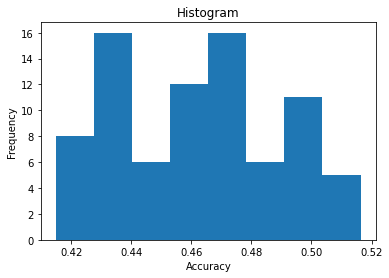

In [53]:
n, bins, patches=plt.hist(accuracies, bins=8)
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

### 考察

従来と同様に､過去3年間を学習させて1年間の勝敗予測を行い､それを13年から20年の8年間を10回分予測した｡
OneHotEncodingしてクラブ名を食べさせても､平均で45.7%となり､精度の向上は見られず､むしろ下がった｡

OneHotしたクラブ名が精度向上につながらない要因として､年間2回しか同じカードはなく､3年間でもカードで6試合､Home､Awayまで一致した試合は3試合しかない｡ そのため､サンプルが少なく､過学習(適合不足かも?)してしまったのではと考えられる｡